In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [4]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역,승차,234.0
1,2008-01-01,150.0,서울역,승차,-420.0
2,2008-01-01,150.0,서울역,승차,-318.0
3,2008-01-01,150.0,서울역,승차,-161.0
4,2008-01-01,150.0,서울역,승차,-205.0
5,2008-01-01,150.0,서울역,승차,13.0
6,2008-01-01,150.0,서울역,승차,538.0
7,2008-01-01,150.0,서울역,승차,632.0
8,2008-01-01,150.0,서울역,승차,604.0
9,2008-01-01,150.0,서울역,승차,808.0


In [5]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [6]:
df['name']

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [7]:
s = df['name']
s

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [8]:
s = list(set(s))
s

['양평',
 '독립문',
 '신설동',
 '양재',
 '길음',
 '우장산',
 '돌곶이',
 '대청',
 '하계',
 '합정',
 '청담',
 '신대방',
 '수락산',
 '지축',
 '중계',
 '오목교',
 '신중동',
 '장승배기',
 '효창공원앞',
 '한강진',
 '경찰병원',
 '광나루',
 '도림천',
 '창신',
 '망원',
 '구의',
 '가산디지털단지',
 '매봉',
 '여의도',
 '어린이대공원',
 '발산',
 '대림',
 '노원',
 '약수',
 '교대',
 '삼성',
 '답십리',
 '충무로',
 '신용산',
 '개롱',
 '길동',
 '경복궁',
 '송정',
 '응암',
 '고속터미널',
 '명동',
 '구산',
 '모란',
 '장암',
 '석계',
 '석촌',
 '월곡',
 '당고개',
 '삼각지',
 '서초',
 '여의나루',
 '숙대입구',
 '둔촌동',
 '신답',
 '서울역',
 '동대문역사문화공원',
 '공덕',
 '거여',
 '사가정',
 '몽촌토성',
 '마들',
 '새절',
 '문래',
 '화랑대',
 '성신여대입구',
 '신촌',
 '구파발',
 '잠실새내',
 '제기동',
 '방화',
 '반포',
 '단대오거리',
 '도곡',
 '영등포시장',
 '상월곡',
 '까치울',
 '강남',
 '이촌',
 '방배',
 '부천시청',
 '당산',
 '혜화',
 '을지로입구',
 '신정',
 '개화산',
 '성수',
 '부천종합운동장',
 '상계',
 '안국',
 '잠실나루',
 '역촌',
 '미아사거리',
 '신금호',
 '남성',
 '암사',
 '강동구청',
 '고려대',
 '중곡',
 '뚝섬유원지',
 '신사',
 '사당',
 '홍대입구',
 '방이',
 '강동',
 '을지로3가',
 '송파',
 '동작',
 '광흥창',
 '연신내',
 '문정',
 '춘의',
 '종합운동장',
 '신림',
 '영등포구청',
 '천호',
 '도봉산',
 '상봉',
 '목동',
 '굽은다리',
 '신대방삼거리',
 '광명사거리',
 '

In [9]:
len(s)

241

In [10]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1000

In [11]:
s[1]

'독립문'

In [12]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [13]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [14]:
data1 = df[df['name']=='강남']
data1

,date,number,name,div,a
620,2008-01-01,222.0,강남,승차,945.0
621,2008-01-01,222.0,강남,승차,314.0
622,2008-01-01,222.0,강남,승차,-64.0
623,2008-01-01,222.0,강남,승차,-205.0
624,2008-01-01,222.0,강남,승차,-806.0
625,2008-01-01,222.0,강남,승차,-405.0
626,2008-01-01,222.0,강남,승차,-336.0
627,2008-01-01,222.0,강남,승차,-474.0
628,2008-01-01,222.0,강남,승차,-628.0
629,2008-01-01,222.0,강남,승차,-584.0


In [15]:
name = data1.iloc[:1,2,]
name

620    강남
Name: name, dtype: object

In [16]:
name = name.to_string(index=False)

In [17]:
name

' 강남'

In [18]:
plt.savefig(name)

<Figure size 432x288 with 0 Axes>

In [19]:
len(data1)

78520

In [20]:
data1.shape

(78520, 5)

                date  number name div        a
620       2008-01-01   222.0   강남  승차    945.0
621       2008-01-01   222.0   강남  승차    314.0
622       2008-01-01   222.0   강남  승차    -64.0
623       2008-01-01   222.0   강남  승차   -205.0
624       2008-01-01   222.0   강남  승차   -806.0
625       2008-01-01   222.0   강남  승차   -405.0
626       2008-01-01   222.0   강남  승차   -336.0
627       2008-01-01   222.0   강남  승차   -474.0
628       2008-01-01   222.0   강남  승차   -628.0
629       2008-01-01   222.0   강남  승차   -584.0
630       2008-01-01   222.0   강남  승차   -661.0
631       2008-01-01   222.0   강남  승차   -751.0
632       2008-01-01   222.0   강남  승차   -839.0
633       2008-01-01   222.0   강남  승차   -723.0
634       2008-01-01   222.0   강남  승차   -198.0
635       2008-01-01   222.0   강남  승차    800.0
636       2008-01-01   222.0   강남  승차   1650.0
637       2008-01-01   222.0   강남  승차   1725.0
638       2008-01-01   222.0   강남  승차    507.0
639       2008-01-01   222.0   강남  승차    -58.0
5860      200

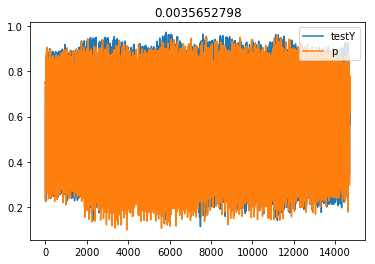

0.0035652798


In [21]:
data1 = df[df['name']=='강남']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 수동학습
# model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
# hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

# 저장된거불러오기
from keras.models import load_model
model = load_model('trythis.h5')
model.summary()


p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
plt.show()
# plt.savefig(datetime.datetime.now())
# plt.savefig(name)
# plt.clf()
print(mean_squared_error(y_test, p))

In [22]:
look_ahead = 1000

In [23]:
xhat = x_test[-1]
# xhat = xhat.reshape(1, 1)

In [42]:
predictions = xhat
predictions.shape

(1000, 1)

In [44]:
# for i in range(look_ahead):
#     prediction = model.predict(np.array([predictions]), batch_size=1)
#     predictions[i] = prediction
#     xhat = np.vstack([xhat[1:], prediction])

In [47]:
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

In [48]:
xhat

array([[0.7852806 ],
       [0.7608688 ],
       [0.742271  ],
       [0.7353272 ],
       [0.726693  ],
       [0.71444714],
       [0.7195848 ],
       [0.73539555],
       [0.76301706],
       [0.7925191 ],
       [0.80050087],
       [0.7722    ],
       [0.74042535],
       [0.71876955],
       [0.7003797 ],
       [0.6901242 ],
       [0.6908028 ],
       [0.7087072 ],
       [0.75277936],
       [0.82029283],
       [0.8550277 ],
       [0.80362725],
       [0.7413374 ],
       [0.71778405],
       [0.6882616 ],
       [0.668446  ],
       [0.65371644],
       [0.646388  ],
       [0.6538069 ],
       [0.6913326 ],
       [0.7696539 ],
       [0.87072337],
       [0.87498283],
       [0.7812611 ],
       [0.7258818 ],
       [0.70943654],
       [0.6738367 ],
       [0.65334415],
       [0.6292815 ],
       [0.60849774],
       [0.5884333 ],
       [0.58381355],
       [0.60526556],
       [0.66563433],
       [0.7528597 ],
       [0.80987275],
       [0.763704  ],
       [0.729

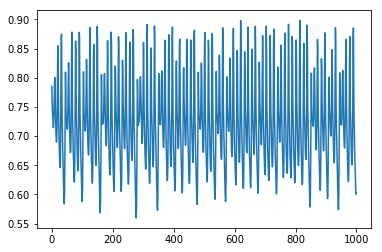

In [50]:
plt.plot(predictions)

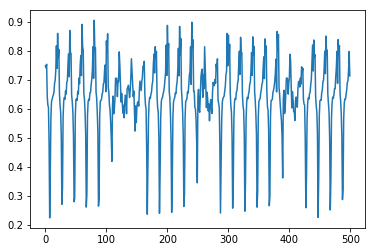

In [28]:
plt.plot(p[:500])

In [29]:
predictions

array([[0.61631387],
       [0.56810302],
       [0.50686789],
       [0.39459687],
       [0.35547927],
       [0.54250461],
       [0.63297397],
       [0.66723192],
       [0.65797174],
       [0.669034  ],
       [0.69761008],
       [0.73046231],
       [0.74836326],
       [0.74047852],
       [0.71918833],
       [0.7108168 ],
       [0.72173798],
       [0.73493028],
       [0.750934  ],
       [0.7728523 ],
       [0.79053617],
       [0.78220963],
       [0.75891298],
       [0.73836005],
       [0.72099531],
       [0.70730245],
       [0.70253646],
       [0.7104944 ],
       [0.737221  ],
       [0.78449094],
       [0.82970303],
       [0.81741107],
       [0.76320386],
       [0.72817278],
       [0.70482063],
       [0.6822139 ],
       [0.66927588],
       [0.66372871],
       [0.67478514],
       [0.71458673],
       [0.79417044],
       [0.88015234],
       [0.85809344],
       [0.76370764],
       [0.72277987],
       [0.70033085],
       [0.66851234],
       [0.648

In [30]:
p[-10:]

array([[0.6675567 ],
       [0.6812125 ],
       [0.72526693],
       [0.7428343 ],
       [0.7766947 ],
       [0.691828  ],
       [0.7585069 ],
       [0.71145713],
       [0.7792598 ],
       [0.6163139 ]], dtype=float32)

In [31]:
y_test[-10:]

array([0.6585556 , 0.6889486 , 0.72184044, 0.7649466 , 0.7019116 ,
       0.71231335, 0.7360842 , 0.7383332 , 0.6617105 , 0.56537765],
      dtype=float32)

In [32]:
x_test[-10:]

array([[[0.61629283],
        [0.6213219 ],
        [0.63106763],
        [0.62925595],
        [0.6574311 ],
        [0.68944836],
        [0.7313363 ],
        [0.7288686 ],
        [0.65580684],
        [0.6229462 ],
        [0.61741734],
        [0.56906354],
        [0.43868306],
        [0.21606171],
        [0.21221966],
        [0.49247205],
        [0.561192  ],
        [0.6079528 ],
        [0.6030174 ],
        [0.6317548 ],
        [0.6739239 ],
        [0.67870307],
        [0.7190604 ],
        [0.8516899 ],
        [0.7468295 ],
        [0.7946211 ],
        [0.86181045],
        [0.8525957 ],
        [0.69238454],
        [0.6223215 ],
        [0.6184794 ],
        [0.5752483 ],
        [0.46514022],
        [0.21478102],
        [0.21827948],
        [0.48809895],
        [0.56103575],
        [0.5968014 ],
        [0.6009871 ],
        [0.6228525 ],
        [0.6516836 ],
        [0.6772662 ],
        [0.725089  ],
        [0.8142687 ],
        [0.720466  ],
        [0

In [33]:
x_train.shape

(61816, 1000, 1)

In [34]:
# x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [35]:
predictions = model.predict(x_train)

In [36]:
predictions.shape

(61816, 1)

In [37]:
future = []
currentStep = predictions[:, -1: :]

In [38]:
for i in range(50):
    currentStep = model.predict(currentStep)
    future.append(currentStep)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (61816, 1)

In [ ]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data', 'train','predict'], loc='best')
plt.show()

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
yhat = y_test
yhat = yhat.reshape(len(yhat), 1, 1)

In [ ]:
y = model.predict(yhat)
y

In [ ]:
data = y

data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(y_test)
plt.xlim(0, 100)

In [ ]:
plt.plot(p)
plt.xlim(0, 100)

In [ ]:
print(y_test[:100])

In [ ]:
print(p[:100])

In [ ]:
plt.scatter(len(y_test), y_test)

In [ ]:
data = y
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
# x_train, y_train = create_dataset(train, look_back)
# x_test, y_test = create_dataset(test, look_back)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# x = range(0,len(y))
x = np.arange(0, len(y))
x=x.reshape(len(x),1)

In [ ]:
print(len(x))
print(len(y))
print(x.shape)
print(y.shape)
print(type(y))
print(type(x))

In [ ]:
x=x.reshape(len(x),1)
x.shape

In [ ]:
data = y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(x_train)
plt.plot(y_train)
plt.show()

In [ ]:
plt.plot(x_train)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(p)

In [ ]:
from xgboost import XGBRegressor
# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x,y, verbose=False)

# Get the mean absolute error on the validation data :
# XGBpredictions = XGBModel.predict(val_X)
# MAE = mean_absolute_error(val_y , XGBpredictions)
# print('XGBoost validation MAE = ',MAE)

In [ ]:
from xgboost import plot_tree
plot_tree(XGBModel)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

In [ ]:
# 저장
model_json = model.to_json()
with open("s[0].json", "w") as json_file :
    json_file.write(model_json)
model.save_weights("s[0].h5")
print("Saved model to disk")

In [ ]:
# # 모델 불러오기
# from keras.models import model_from_json
# json_file = open("model1.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# model.load_weights("model1.h5")
# model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
data = y # p
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
x = np.arange(0, len(y))
x=x.reshape(len(x),1)
x = scaler.fit_transform(x)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

y_train = data[0:train_size]
y_test = data[train_size:len(data)]
x_train = x[0:train_size]
x_test = x[train_size:len(x)]
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(p)

In [ ]:
plt.plot(y_test)